In [30]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt

In [31]:
sold_merged = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_merged.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string', 'po_box':'object'}, parse_dates = ['prev_sold_date'])

In [32]:
# Begin to investigate missingness.
sold_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810534 entries, 0 to 810533
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   brokered_by            807519 non-null  string        
 1   price                  810534 non-null  float64       
 2   bed                    740899 non-null  float64       
 3   bath                   732941 non-null  float64       
 4   acre_lot               703146 non-null  float64       
 5   street                 808281 non-null  string        
 6   city                   810436 non-null  object        
 7   state                  810534 non-null  object        
 8   zip_code               810534 non-null  string        
 9   house_size             707238 non-null  float64       
 10  prev_sold_date         810534 non-null  datetime64[ns]
 11  county                 810534 non-null  object        
 12  avgtemp                810534 non-null  floa

<Axes: >

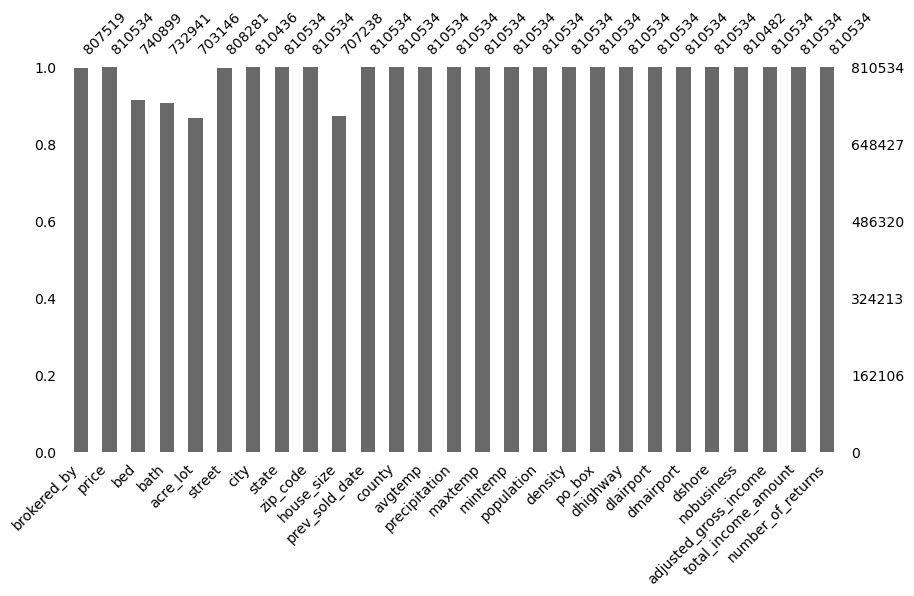

In [33]:
missingno.bar(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

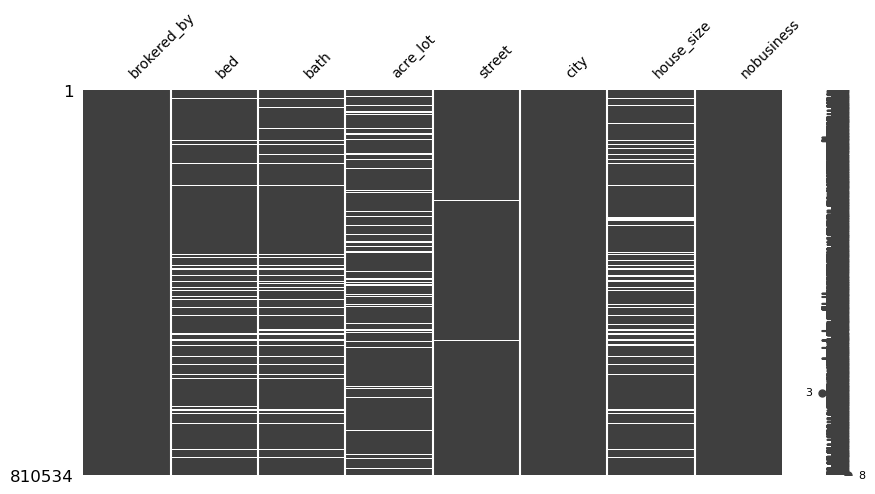

In [34]:
# See missingness patterns for variables with at least 1 missing value
missingno.matrix(sold_merged[['brokered_by', 'bed', 'bath', 'acre_lot', 'street', 'city', 'house_size', 'nobusiness']], figsize = (10,5), fontsize = 10)

<Axes: >

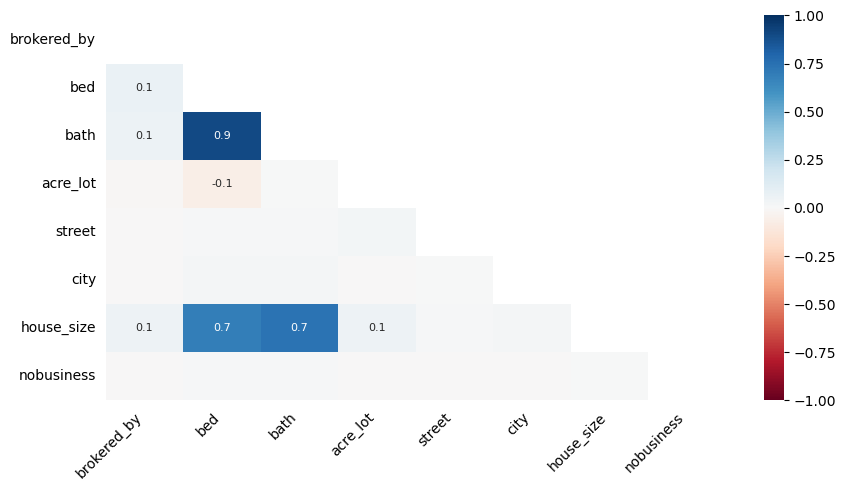

In [35]:
missingno.heatmap(sold_merged, figsize = (10,5), fontsize = 10)

<Axes: >

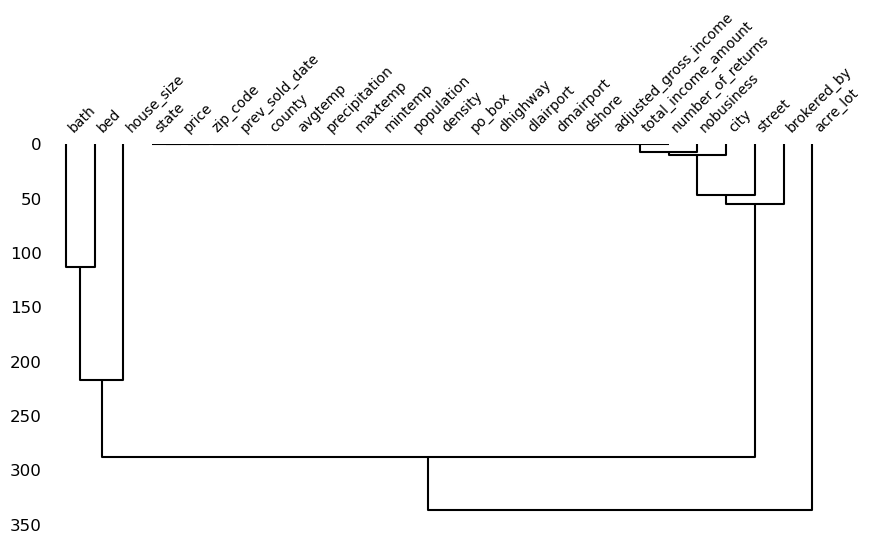

In [36]:
missingno.dendrogram(sold_merged, figsize = (10,5), fontsize = 10)

In [37]:
# Correlations to see if there are any strong ones which could be used for imputation
sold_merged.corr(numeric_only = True)

,price,bed,bath,acre_lot,house_size,avgtemp,precipitation,maxtemp,mintemp,population,density,dhighway,dlairport,dmairport,dshore,nobusiness,adjusted_gross_income,total_income_amount,number_of_returns
price,1.000000,0.217456,0.378550,0.004390,0.182889,0.021380,-0.128934,0.022541,0.019156,0.052003,0.182241,-0.061021,-0.125890,-0.059708,-0.115048,0.185891,0.336128,0.336403,0.060816
bed,0.217456,1.000000,0.646696,0.000489,0.324914,-0.030698,-0.004256,-0.024916,-0.035849,0.044576,-0.084961,-0.014726,0.010092,0.003677,0.018686,-0.059057,0.013728,0.013716,0.034700
bath,0.378550,0.646696,1.000000,-0.002069,0.388604,0.045494,0.027392,0.044805,0.044572,0.058191,-0.046688,-0.033421,-0.054691,-0.006869,-0.015284,0.047553,0.164697,0.164992,0.060684
acre_lot,0.004390,0.000489,-0.002069,1.000000,0.000391,-0.006802,-0.003981,-0.006202,-0.007251,-0.003673,-0.001197,0.002342,0.008704,-0.003384,-0.000087,-0.001401,-0.003901,-0.003902,-0.003967
house_size,0.182889,0.324914,0.388604,0.000391,1.000000,-0.009821,0.010888,-0.009266,-0.009971,-0.000277,-0.030398,0.008321,0.001379,0.012825,0.014669,-0.002265,0.051982,0.052130,-0.002203
avgtemp,0.021380,-0.030698,0.045494,-0.006802,-0.009821,1.000000,-0.035619,0.984013,0.980570,0.209946,-0.014034,-0.046862,-0.160278,-0.100532,-0.056253,0.052217,0.092862,0.092589,0.198837
precipitation,-0.128934,-0.004256,0.027392,-0.003981,0.010888,-0.035619,1.000000,-0.155155,0.097741,-0.138255,-0.035237,0.010266,-0.115940,0.007949,-0.205215,-0.048448,-0.074060,-0.074209,-0.120728
maxtemp,0.022541,-0.024916,0.044805,-0.006202,-0.009266,0.984013,-0.155155,1.000000,0.929991,0.215253,-0.047521,-0.025182,-0.092653,-0.083602,0.046589,0.039049,0.074913,0.074657,0.198600
mintemp,0.019156,-0.035849,0.044572,-0.007251,-0.009971,0.980570,0.097741,0.929991,1.000000,0.196103,0.022798,-0.069030,-0.228549,-0.115399,-0.166559,0.064544,0.108790,0.108508,0.191507
population,0.052003,0.044576,0.058191,-0.003673,-0.000277,0.209946,-0.138255,0.215253,0.196103,1.000000,0.224683,-0.265476,-0.189203,-0.243571,-0.059178,0.525876,0.567081,0.566581,0.985149


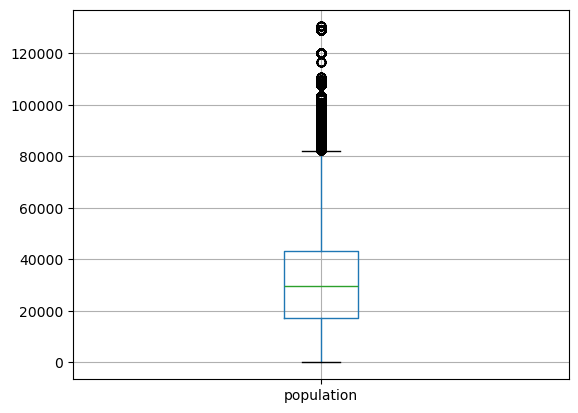

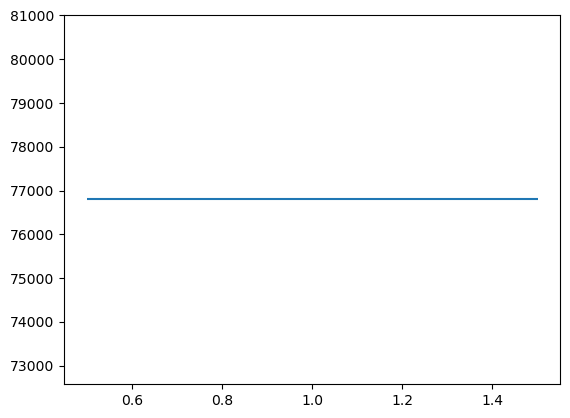

In [38]:
# Boxplots to observe distributions
x = 'population'
sold_merged.boxplot(x)
plt.show()
plt.hlines(y = sold_merged[x].quantile(0.975), xmin = 0.5, xmax = 1.5)

Text(0, 0.5, 'Median Price ($)')

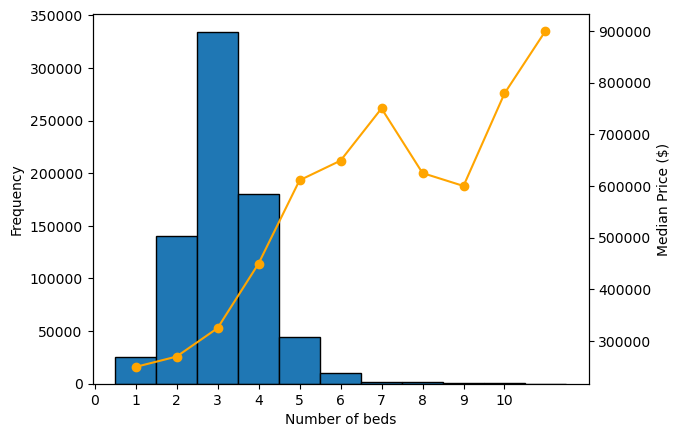

In [39]:
# Bedroom univariate
fig, ax = plt.subplots()

hist_bed = ax.hist(sold_merged[sold_merged.bed <= sold_merged.bed.quantile(0.999)].bed, ec = 'black', bins = np.arange(0,sold_merged.bed.quantile(0.999)+1)+0.5)
prices = [sold_merged[sold_merged.bed == x].price.median() for x in np.arange(1,sold_merged.bed.quantile(0.999)+1)]
ax.set_xticks(ticks = np.arange(0,11), labels = np.arange(0,11))
ax.set_xlabel('Number of beds')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(np.arange(1,sold_merged.bed.quantile(0.999)+1), prices, color = 'orange')
ax2.scatter(np.arange(1,sold_merged.bed.quantile(0.999)+1), prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')

Text(0, 0.5, 'Median Price ($)')

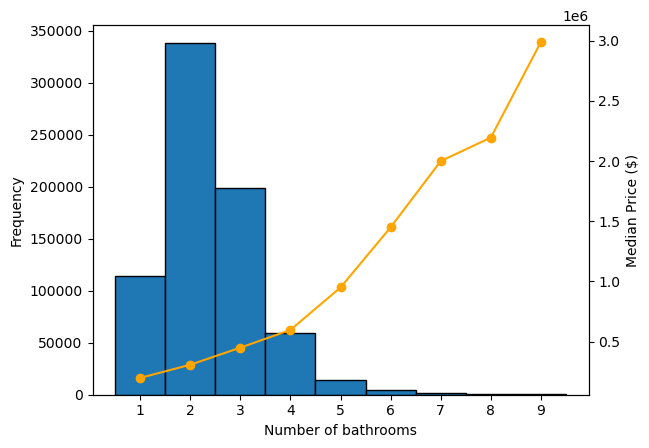

In [40]:
# Bathroom univariate
fig, ax = plt.subplots()

hist_bath = ax.hist(sold_merged[sold_merged.bath <= sold_merged.bed.quantile(0.999)].bath, ec = 'black', bins = np.arange(0,sold_merged.bath.quantile(0.999)+1)+0.5)
prices = [sold_merged[sold_merged.bath == x].price.median() for x in np.arange(1,sold_merged.bath.quantile(0.999)+1)]
ax.set_xticks(ticks = np.arange(0,10), labels = np.arange(0,10))
ax.set_xlabel('Number of bathrooms')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(np.arange(1,sold_merged.bath.quantile(0.999)+1), prices, color = 'orange')
ax2.scatter(np.arange(1,sold_merged.bath.quantile(0.999)+1), prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')

[609.0, 1627.0, 2645.0, 3663.0, 4681.0, 5699.0, 6717.0, 7735.0, 8753.0, 9771.0]


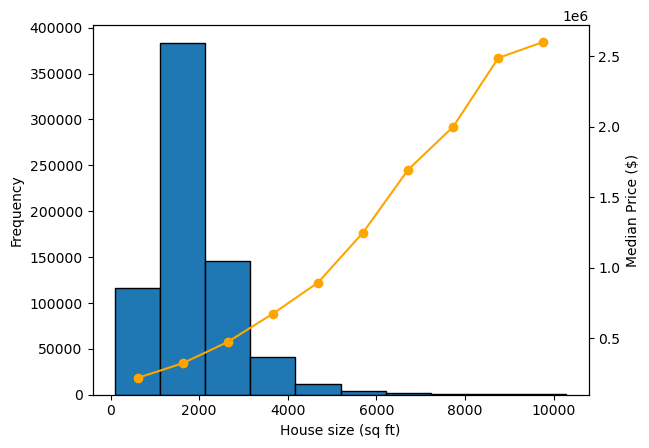

In [41]:
# House size univariate
fig, ax = plt.subplots()

hist_size = ax.hist(sold_merged[sold_merged.house_size <= sold_merged.house_size.quantile(0.999)].house_size, ec = 'black')
midpts = [((hist_size[1][x] + hist_size[1][x+1])/2) for x in range(len(hist_size[1])-1)]
prices = [sold_merged[(sold_merged.house_size >= hist_size[1][x]) & (sold_merged.house_size < hist_size[1][x+1])].price.median() for x in range(len(hist_size[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('House size (sq ft)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[0.089, 0.267, 0.445, 0.623, 0.8009999999999999, 0.979, 1.157, 1.335, 1.513, 1.6909999999999998]


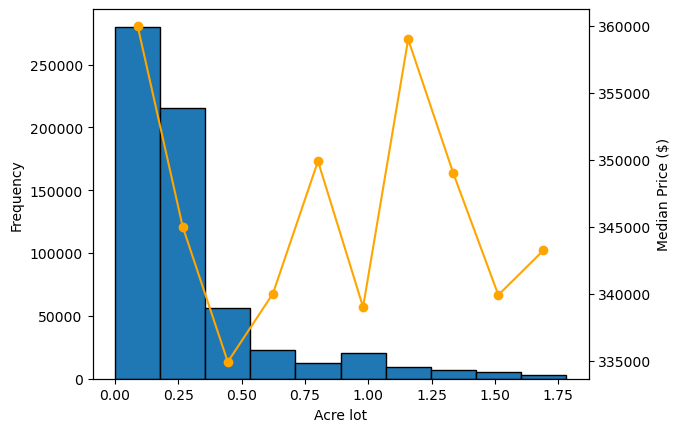

In [42]:
# Acre lot univariate
fig, ax = plt.subplots()

hist_acre = ax.hist(sold_merged[sold_merged.acre_lot <= sold_merged.acre_lot.quantile(0.9)].acre_lot, ec = 'black')
midpts = [((hist_acre[1][x] + hist_acre[1][x+1])/2) for x in range(len(hist_acre[1])-1)]
prices = [sold_merged[(sold_merged.acre_lot >= hist_acre[1][x]) & (sold_merged.acre_lot < hist_acre[1][x+1])].price.median() for x in range(len(hist_acre[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Acre lot')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[39.44, 43.519999999999996, 47.6, 51.68, 55.76, 59.839999999999996, 63.92, 68.0, 72.08, 76.16]


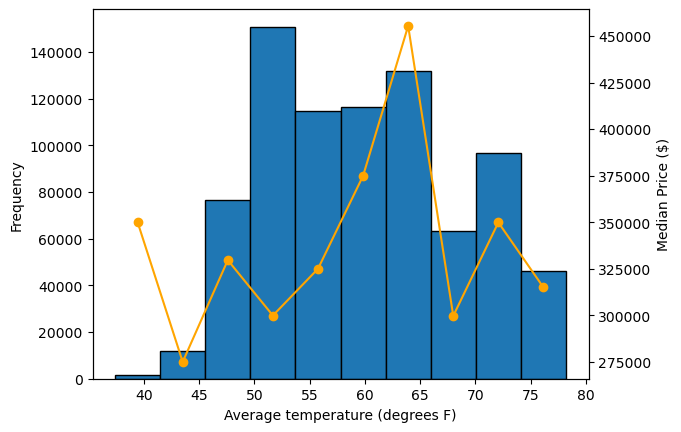

In [43]:
# Average temp univariate
fig, ax = plt.subplots()

hist_avgtemp = ax.hist(sold_merged.avgtemp, ec = 'black')
midpts = [((hist_avgtemp[1][x] + hist_avgtemp[1][x+1])/2) for x in range(len(hist_avgtemp[1])-1)]
prices = [sold_merged[(sold_merged.avgtemp >= hist_avgtemp[1][x]) & (sold_merged.avgtemp < hist_avgtemp[1][x+1])].price.median() for x in range(len(hist_avgtemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Average temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[49.80500000000001, 54.015, 58.225, 62.434999999999995, 66.645, 70.85499999999999, 75.065, 79.27499999999999, 83.485, 87.695]


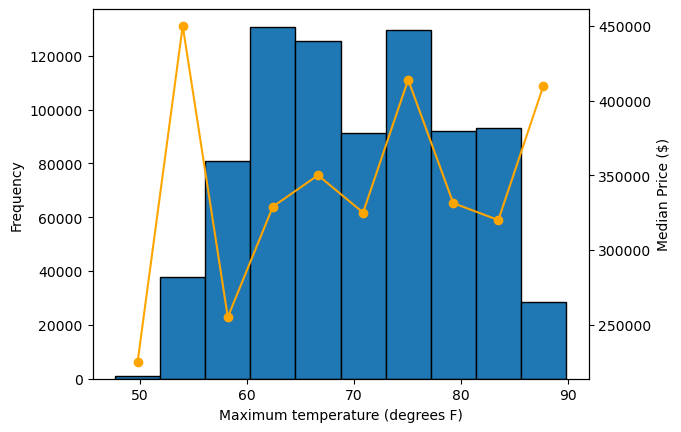

In [44]:
# Max temp univariate
fig, ax = plt.subplots()

hist_maxtemp = ax.hist(sold_merged.maxtemp, ec = 'black')
midpts = [((hist_maxtemp[1][x] + hist_maxtemp[1][x+1])/2) for x in range(len(hist_maxtemp[1])-1)]
prices = [sold_merged[(sold_merged.maxtemp >= hist_maxtemp[1][x]) & (sold_merged.maxtemp < hist_maxtemp[1][x+1])].price.median() for x in range(len(hist_maxtemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Maximum temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[27.815, 32.245000000000005, 36.675, 41.105000000000004, 45.535000000000004, 49.965, 54.39500000000001, 58.825, 63.255, 67.685]


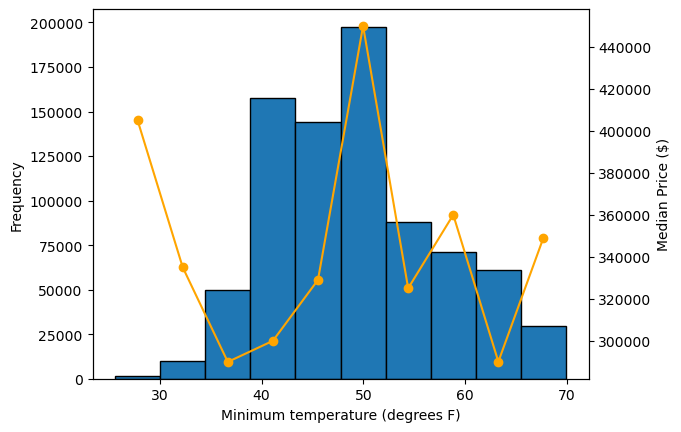

In [45]:
# Min temp univariate
fig, ax = plt.subplots()

hist_mintemp = ax.hist(sold_merged.mintemp, ec = 'black')
midpts = [((hist_mintemp[1][x] + hist_mintemp[1][x+1])/2) for x in range(len(hist_mintemp[1])-1)]
prices = [sold_merged[(sold_merged.mintemp >= hist_mintemp[1][x]) & (sold_merged.mintemp < hist_mintemp[1][x+1])].price.median() for x in range(len(hist_mintemp[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Minimum temperature (degrees F)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[7.997, 19.451, 30.905, 42.35900000000001, 53.813, 65.267, 76.721, 88.175, 99.629, 111.083]


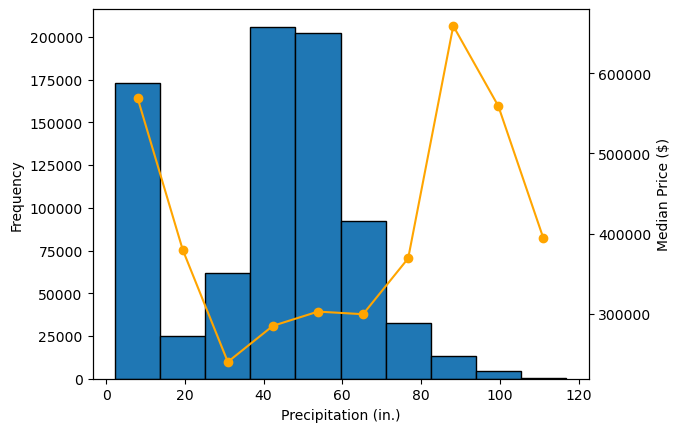

In [46]:
# Precipitation univariate
fig, ax = plt.subplots()

hist_precip = ax.hist(sold_merged.precipitation, ec = 'black')
midpts = [((hist_precip[1][x] + hist_precip[1][x+1])/2) for x in range(len(hist_precip[1])-1)]
prices = [sold_merged[(sold_merged.precipitation >= hist_precip[1][x]) & (sold_merged.precipitation < hist_precip[1][x+1])].price.median() for x in range(len(hist_precip[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Precipitation (in.)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[6517.6, 19552.800000000003, 32588.000000000004, 45623.200000000004, 58658.4, 71693.6, 84728.80000000002, 97764.0, 110799.20000000001, 123834.4]


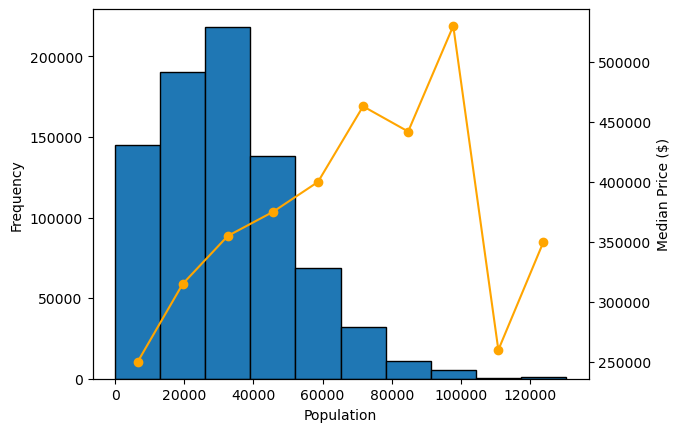

In [47]:
# Population univariate
fig, ax = plt.subplots()

hist_pop = ax.hist(sold_merged.population, ec = 'black')
midpts = [((hist_pop[1][x] + hist_pop[1][x+1])/2) for x in range(len(hist_pop[1])-1)]
prices = [sold_merged[(sold_merged.population >= hist_pop[1][x]) & (sold_merged.population < hist_pop[1][x+1])].price.median() for x in range(len(hist_pop[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Population')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[606.83, 1820.4900000000002, 3034.1500000000005, 4247.81, 5461.47, 6675.130000000001, 7888.790000000001, 9102.45, 10316.11, 11529.77]


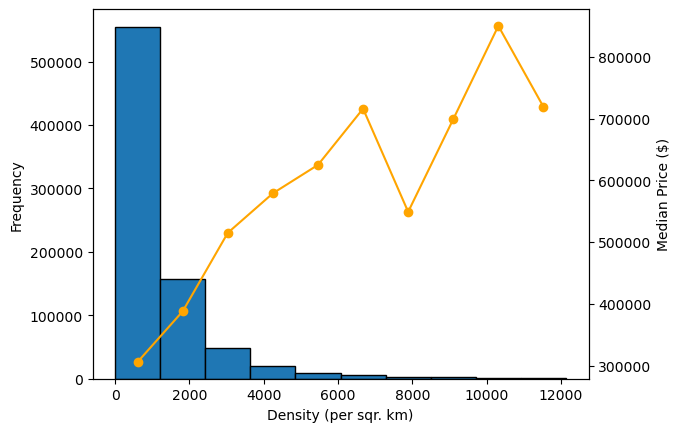

In [48]:
# Density univariate
fig, ax = plt.subplots()

hist_density = ax.hist(sold_merged[sold_merged.density <= sold_merged.density.quantile(0.99)].density, ec = 'black')
midpts = [((hist_density[1][x] + hist_density[1][x+1])/2) for x in range(len(hist_density[1])-1)]
prices = [sold_merged[(sold_merged.density >= hist_density[1][x]) & (sold_merged.density < hist_density[1][x+1])].price.median() for x in range(len(hist_density[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Density (per sqr. km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[3.6233293222, 10.8694214146, 18.115513507, 25.3616055994, 32.6076976918, 39.853789784199996, 47.099881876599994, 54.345973969, 61.592066061400004, 68.83815815380001]


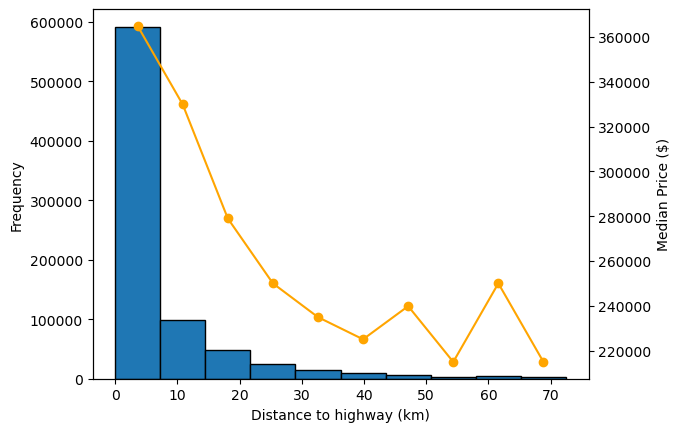

In [49]:
# Distance to highway univariate
fig, ax = plt.subplots()

hist_dhighway = ax.hist(sold_merged[sold_merged.dhighway <= sold_merged.dhighway.quantile(0.99)].dhighway, ec = 'black')
midpts = [((hist_dhighway[1][x] + hist_dhighway[1][x+1])/2) for x in range(len(hist_dhighway[1])-1)]
prices = [sold_merged[(sold_merged.dhighway >= hist_dhighway[1][x]) & (sold_merged.dhighway < hist_dhighway[1][x+1])].price.median() for x in range(len(hist_dhighway[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to highway (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[26.949161561149992, 79.99864564944998, 133.04812973774997, 186.09761382604995, 239.14709791434996, 292.19658200264996, 345.2460660909499, 398.2955501792499, 451.3450342675499, 504.39451835585]


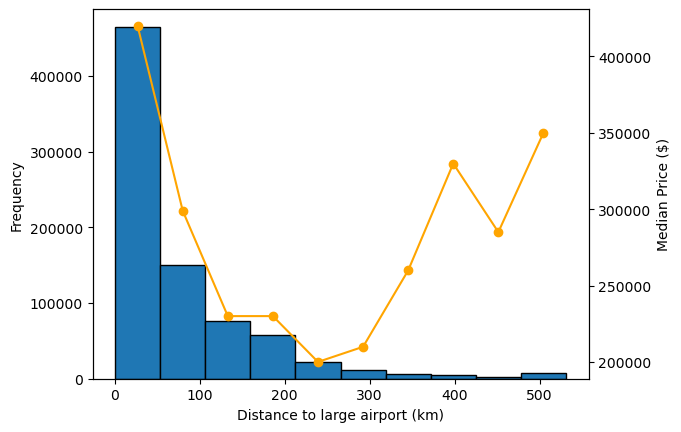

In [50]:
# Distance to large airport univariate
fig, ax = plt.subplots()

hist_lairport = ax.hist(sold_merged[sold_merged.dlairport <= sold_merged.dlairport.quantile(0.99)].dlairport, ec = 'black')
midpts = [((hist_lairport[1][x] + hist_lairport[1][x+1])/2) for x in range(len(hist_lairport[1])-1)]
prices = [sold_merged[(sold_merged.dlairport >= hist_lairport[1][x]) & (sold_merged.dlairport < hist_lairport[1][x+1])].price.median() for x in range(len(hist_lairport[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to large airport (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[4.675744839000001, 13.637071817, 22.598398795, 31.559725773000004, 40.521052751000006, 49.482379729, 58.443706707000004, 67.405033685, 76.366360663, 85.32768764100001]


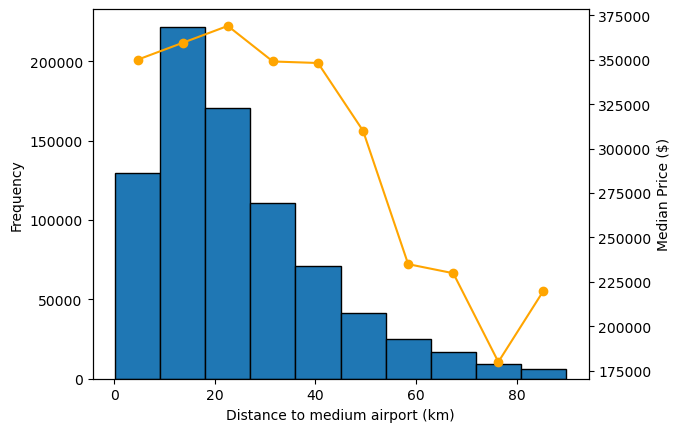

In [51]:
# Distance to medium airport univariate
fig, ax = plt.subplots()

hist_mairport = ax.hist(sold_merged[sold_merged.dmairport <= sold_merged.dmairport.quantile(0.99)].dmairport, ec = 'black')
midpts = [((hist_mairport[1][x] + hist_mairport[1][x+1])/2) for x in range(len(hist_mairport[1])-1)]
prices = [sold_merged[(sold_merged.dmairport >= hist_mairport[1][x]) & (sold_merged.dmairport < hist_mairport[1][x+1])].price.median() for x in range(len(hist_mairport[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to medium airport (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[51.9432678565, 155.8069050295, 259.6705422025, 363.5341793755, 467.39781654850003, 571.2614537215, 675.1250908944999, 778.9887280675, 882.8523652404999, 986.7160024135001]


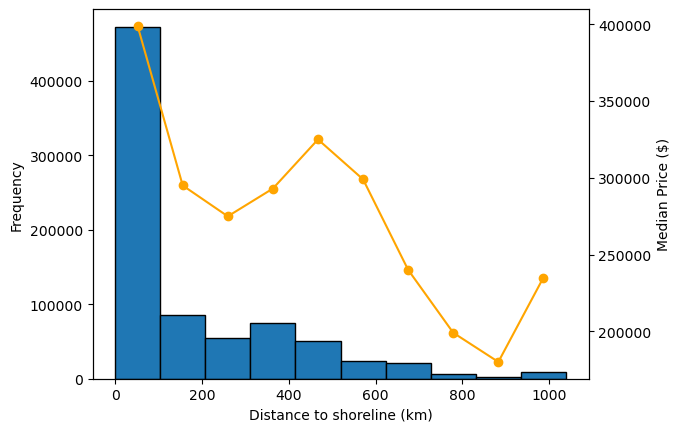

In [52]:
# Distance to shoreline univariate
fig, ax = plt.subplots()

hist_shoreline = ax.hist(sold_merged[sold_merged.dshore <= sold_merged.dshore.quantile(0.99)].dshore, ec = 'black')
midpts = [((hist_shoreline[1][x] + hist_shoreline[1][x+1])/2) for x in range(len(hist_shoreline[1])-1)]
prices = [sold_merged[(sold_merged.dshore >= hist_shoreline[1][x]) & (sold_merged.dshore < hist_shoreline[1][x+1])].price.median() for x in range(len(hist_shoreline[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Distance to shoreline (km)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[125.05, 373.15, 621.25, 869.3499999999999, 1117.45, 1365.55, 1613.65, 1861.75, 2109.85, 2357.95]


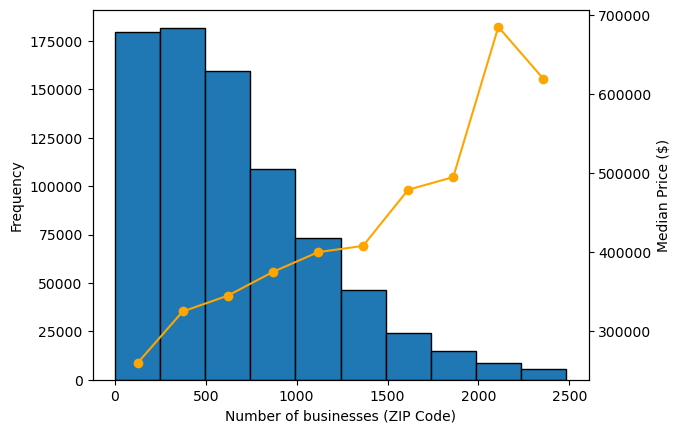

In [53]:
# Number of businesses univariate
fig, ax = plt.subplots()

hist_business = ax.hist(sold_merged[sold_merged.nobusiness <= sold_merged.nobusiness.quantile(0.99)].nobusiness, ec = 'black')
midpts = [((hist_business[1][x] + hist_business[1][x+1])/2) for x in range(len(hist_business[1])-1)]
prices = [sold_merged[(sold_merged.nobusiness >= hist_business[1][x]) & (sold_merged.nobusiness < hist_business[1][x+1])].price.median() for x in range(len(hist_business[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Number of businesses (ZIP Code)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[307410.85, 916382.5499999999, 1525354.25, 2134325.9499999997, 2743297.65, 3352269.3499999996, 3961241.05, 4570212.75, 5179184.449999999, 5788156.15]


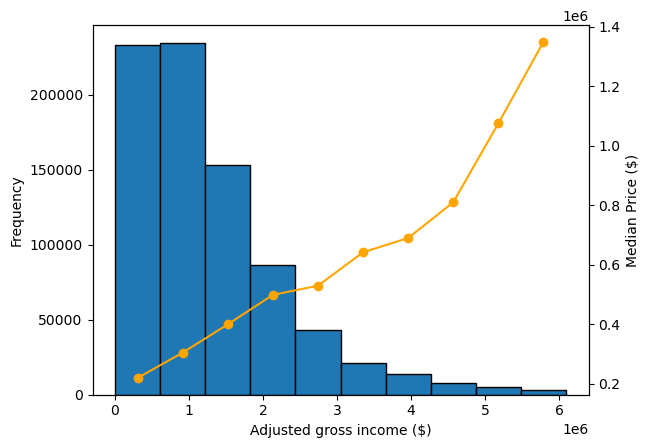

In [54]:
# Adjusted income univariate
fig, ax = plt.subplots()

hist_incomea = ax.hist(sold_merged[sold_merged.adjusted_gross_income <= sold_merged.adjusted_gross_income.quantile(0.99)].adjusted_gross_income, ec = 'black')
midpts = [((hist_incomea[1][x] + hist_incomea[1][x+1])/2) for x in range(len(hist_incomea[1])-1)]
prices = [sold_merged[(sold_merged.adjusted_gross_income >= hist_incomea[1][x]) & (sold_merged.adjusted_gross_income < hist_incomea[1][x+1])].price.median() for x in range(len(hist_incomea[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Adjusted gross income ($)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[310722.45, 926317.3500000001, 1541912.25, 2157507.1500000004, 2773102.05, 3388696.95, 4004291.85, 4619886.75, 5235481.65, 5851076.550000001]


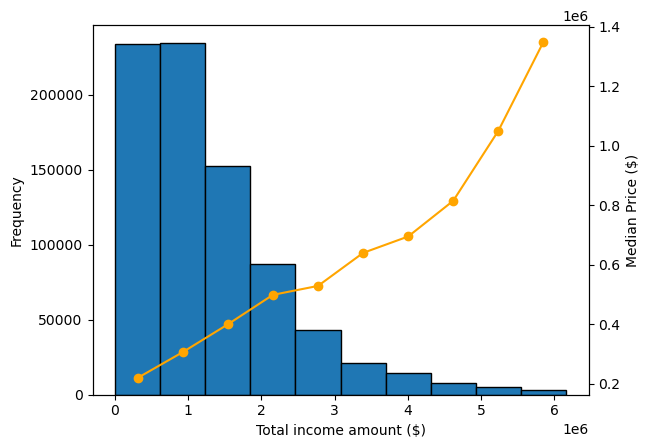

In [55]:
# Total income univariate
fig, ax = plt.subplots()

hist_incomet = ax.hist(sold_merged[sold_merged.total_income_amount <= sold_merged.total_income_amount.quantile(0.99)].total_income_amount, ec = 'black')
midpts = [((hist_incomet[1][x] + hist_incomet[1][x+1])/2) for x in range(len(hist_incomet[1])-1)]
prices = [sold_merged[(sold_merged.total_income_amount >= hist_incomet[1][x]) & (sold_merged.total_income_amount < hist_incomet[1][x+1])].price.median() for x in range(len(hist_incomet[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Total income amount ($)')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

[2183.5, 6370.5, 10557.5, 14744.5, 18931.5, 23118.5, 27305.5, 31492.5, 35679.5, 39866.5]


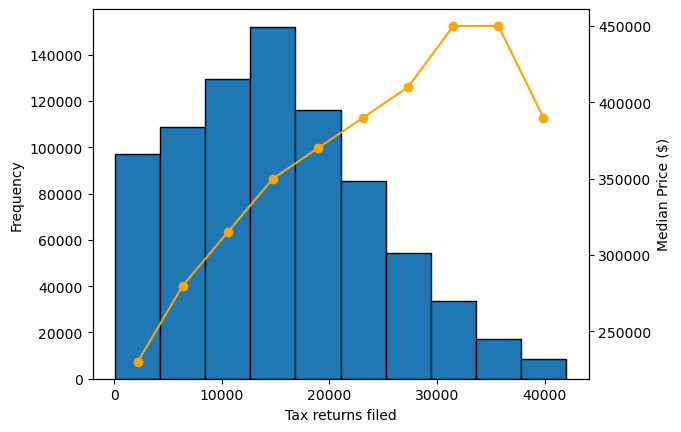

In [56]:
# Tax returns univariate
fig, ax = plt.subplots()

hist_treturns = ax.hist(sold_merged[sold_merged.number_of_returns <= sold_merged.number_of_returns.quantile(0.99)].number_of_returns, ec = 'black')
midpts = [((hist_treturns[1][x] + hist_treturns[1][x+1])/2) for x in range(len(hist_treturns[1])-1)]
prices = [sold_merged[(sold_merged.number_of_returns >= hist_treturns[1][x]) & (sold_merged.number_of_returns < hist_treturns[1][x+1])].price.median() for x in range(len(hist_treturns[1])-1)]
# ax.set_xticks(ticks = midpts, labels = midpts)
ax.set_xlabel('Tax returns filed')
ax.set_ylabel('Frequency')
# ax.set_yscale('log')
ax2 = ax.twinx()
ax2.plot(midpts, prices, color = 'orange')
ax2.scatter(midpts, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)')
print(midpts)

In [57]:
# Functions for capping outliers on columns
def cap_outliers_percentile(column, percentile):
    col = sold_merged[column]
    cap = col.quantile(percentile)
    print('Capped ', column, ' on the ', percentile*100, 'th percentile (', cap, ')', sep = '')
    return col.apply(lambda x: cap if x > cap else x)

def cap_outliers_value(column, cap, side = 'above'):
    col = sold_merged[column]
    print('Capped ', column, ' from ', side, ' on ', cap, sep = '')
    if side == 'above':
        return col.apply(lambda x: cap if x > cap else x)
    if side == 'below':
        return col.apply(lambda x: cap if x < cap else x)
    else:
        print('Please choose either \'above\' or \'below\' for side argument.')

In [73]:
# Cap outliers in new columns
sold_merged['treated_bed'] = cap_outliers_percentile('bed', 0.99)
sold_merged['treated_bath'] = cap_outliers_percentile('bath', 0.99)
sold_merged['treated_acre'] = cap_outliers_percentile('acre_lot', 0.95)
sold_merged['treated_size'] = cap_outliers_percentile('house_size', 0.99)
sold_merged['treated_avgtemp'] = cap_outliers_value('avgtemp', 43.519999999999996, 'below')
sold_merged['treated_maxtemp'] = cap_outliers_value('maxtemp', 58.225, 'below')
sold_merged['treated_mintemp'] = cap_outliers_value('mintemp', 36.675, 'below')
sold_merged['treated_precip'] = cap_outliers_value('precipitation', 88.175)
sold_merged['treated_pop'] = cap_outliers_value('population', 96874)
sold_merged['treated_density'] = cap_outliers_value('density', 5548.365)
sold_merged['treated_dhighway'] = cap_outliers_value('dhighway', 40.80598856361732)
sold_merged['treated_dlairport'] = cap_outliers_value('dlairport', 240.3445185128118)
sold_merged['treated_dmairport'] = cap_outliers_value('dmairport', 67.965371255)
sold_merged['treated_dshore'] = cap_outliers_value('dshore', 675.6745467796691)
sold_merged['treated_nobusiness'] = cap_outliers_value('nobusiness', 2110)
sold_merged['treated_totalincome'] = cap_outliers_value('total_income_amount', 6063217.25)
sold_merged['treated_adjustedincome'] = cap_outliers_value('adjusted_gross_income', 5997873.4)
sold_merged['treated_returns'] = cap_outliers_value('number_of_returns', 31493)
sold_merged['treated_price'] = cap_outliers_value('price', 4000000)

Capped bed on the 99.0th percentile (6.0)
Capped bath on the 99.0th percentile (6.0)
Capped acre_lot on the 95.0th percentile (5.0)
Capped house_size on the 99.0th percentile (5459.630000000005)
Capped avgtemp from below on 43.519999999999996
Capped maxtemp from below on 58.225
Capped mintemp from below on 36.675
Capped precipitation from above on 88.175
Capped population from above on 96874
Capped density from above on 5548.365
Capped dhighway from above on 40.80598856361732
Capped dlairport from above on 240.3445185128118
Capped dmairport from above on 67.965371255
Capped dshore from above on 675.6745467796691
Capped nobusiness from above on 2110
Capped total_income_amount from above on 6063217.25
Capped adjusted_gross_income from above on 5997873.4
Capped number_of_returns from above on 31493
Capped price from above on 4000000


In [74]:
# In advance of any imputation, add a flag to say if the value was originally missing
sold_merged['missing_bed'] = sold_merged['bed'].isna().astype('int')
sold_merged['missing_bath'] = sold_merged['bath'].isna().astype('int')
sold_merged['missing_acre'] = sold_merged['acre_lot'].isna().astype('int')
sold_merged['missing_size'] = sold_merged['house_size'].isna().astype('int')

In [75]:
# Filling missing bed values where house_size is present
bed1_size_med = sold_merged[sold_merged.bed == 1].house_size.median()
bed2_size_med = sold_merged[sold_merged.bed == 2].house_size.median()
bed3_size_med = sold_merged[sold_merged.bed == 3].house_size.median()
bed4_size_med = sold_merged[sold_merged.bed == 4].house_size.median()
bed5_size_med = sold_merged[sold_merged.bed == 5].house_size.median()
bed6_size_med = sold_merged[sold_merged.bed == 6].house_size.median()
print(bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med)
# We will compare the house_size for these rows against the medians and impute bed number based on which is closest.
# Get indices of relevant rows.
indices = sold_merged[(sold_merged.bed.isna()) & (sold_merged.house_size.notna())].index
# Form list of medians.
medians = [bed1_size_med, bed2_size_med, bed3_size_med, bed4_size_med, bed5_size_med, bed6_size_med]
# Impute for the relevant rows.
for n in indices:
    size = sold_merged.house_size[n]
    diffs = [abs(size - x) for x in medians]
    sold_merged.loc[n, 'treated_bed'] = np.argmin(diffs)+1

745.0 1146.0 1593.0 2260.0 3064.0 3396.0


In [76]:
# Filling missing bath values where house_size is present
bath1_size_med = sold_merged[sold_merged.bath == 1].house_size.median()
bath2_size_med = sold_merged[sold_merged.bath == 2].house_size.median()
bath3_size_med = sold_merged[sold_merged.bath == 3].house_size.median()
bath4_size_med = sold_merged[sold_merged.bath == 4].house_size.median()
bath5_size_med = sold_merged[sold_merged.bath == 5].house_size.median()
bath6_size_med = sold_merged[sold_merged.bath == 6].house_size.median()
print(bath1_size_med, bath2_size_med, bath3_size_med, bath4_size_med, bath5_size_med, bath6_size_med)
# We will compare the house_size for these rows against the medians and impute bath number based on which is closest.
# Get indices of relevant rows.
indices = sold_merged[(sold_merged.bath.isna()) & (sold_merged.house_size.notna())].index
# Form list of medians.
medians = [bath1_size_med, bath2_size_med, bath3_size_med, bath4_size_med, bath5_size_med, bath6_size_med]
# Impute for the relevant rows.
for n in indices:
    size = sold_merged.house_size[n]
    diffs = [abs(size - x) for x in medians]
    sold_merged.loc[n, 'treated_bath'] = np.argmin(diffs)+1

1000.0 1508.0 2185.0 3000.0 4041.0 4943.5


In [77]:
# Imputing remaining 
bed_med = sold_merged.bed.median()
bath_med = sold_merged.bath.median()
acre_med = sold_merged.acre_lot.median()
size_med = sold_merged.house_size.median()
sold_merged['treated_bed'] = sold_merged['treated_bed'].where(~((sold_merged['missing_bed'] == 1) & (sold_merged['missing_size'] == 1)), bed_med)
sold_merged['treated_bath'] = sold_merged['treated_bath'].where(~((sold_merged['missing_bath'] == 1) & (sold_merged['missing_size'] == 1)), bath_med)
sold_merged['treated_acre'] = sold_merged['treated_acre'].where(~(sold_merged['missing_acre'] == 1), acre_med)
sold_merged['treated_size'] = sold_merged['treated_size'].where(~(sold_merged['missing_size'] == 1), size_med)

In [79]:
# Make a clean copy of the dataframe containing only the variables we need
sold_treated = sold_merged.copy()
sold_treated = sold_treated[['brokered_by', 'treated_price', 'street', 'city', 'state', 'zip_code', 'prev_sold_date', 'county', 'po_box', 'treated_bed', 'treated_bath', 'treated_acre', 'treated_size', 'treated_avgtemp', 'treated_maxtemp', 'treated_mintemp', 'treated_precip', 'treated_pop', 'treated_density', 'treated_dhighway', 'treated_dlairport', 'treated_dmairport', 'treated_dshore', 'treated_nobusiness', 'treated_totalincome', 'treated_adjustedincome', 'treated_returns', 'missing_bed', 'missing_bath', 'missing_acre', 'missing_size']]
sold_treated = sold_treated.dropna()
sold_treated = sold_treated.rename(columns = {'treated_price':'price', 'treated_bed':'bed', 'treated_bath':'bath', 'treated_acre':'acre_lot', 'treated_size':'house_size', 'treated_avgtemp':'avgtemp', 'treated_maxtemp':'maxtemp', 'treated_mintemp':'mintemp', 'treated_precip':'precipitation', 'treated_pop':'population', 'treated_density':'density', 'treated_dhighway':'dhighway', 'treated_dlairport':'dlairport', 'treated_dmairport':'dmairport', 'treated_dshore':'dshore', 'treated_nobusiness':'nobusiness', 'treated_totalincome':'totalincome', 'treated_adjustedincome':'adjustedincome', 'treated_returns':'tax_returns'})

In [80]:
sold_treated.to_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_treated.csv", index = False)